In [45]:
import pandas as pd

weather = pd.read_csv("weather_mumbai_1.csv" , index_col="DATE")
import numpy as np



In [46]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1970-01-01,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-02,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-03,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-04,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-05,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1970-12-27,IN012121100,"MATHERAN, IN",0.0,NaN,NaN,NaN
1970-12-28,IN012121100,"MATHERAN, IN",0.0,NaN,NaN,NaN
1970-12-29,IN012121100,"MATHERAN, IN",0.0,NaN,NaN,NaN


In [48]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.297531
TAVG       0.185708
TMAX       0.429753
TMIN       0.368298
dtype: float64

In [49]:
valid_columns = weather.columns[null_pct < .43]

In [50]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [51]:
weather = weather[valid_columns].copy()

In [52]:
weather.columns = weather.columns.str.lower()

In [53]:
weather

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
1970-01-01,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-02,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-03,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-04,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
1970-01-05,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1970-12-27,IN012121100,"MATHERAN, IN",0.0,NaN,NaN,NaN
1970-12-28,IN012121100,"MATHERAN, IN",0.0,NaN,NaN,NaN
1970-12-29,IN012121100,"MATHERAN, IN",0.0,NaN,NaN,NaN


In [54]:
weather = weather.ffill()

In [55]:
weather.apply(pd.isnull).sum()

station       0
name          0
prcp          0
tavg       2828
tmax       2832
tmin       2832
dtype: int64

In [56]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [57]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '1970-12-22', '1970-12-23', '1970-12-24', '1970-12-25', '1970-12-26',
       '1970-12-27', '1970-12-28', '1970-12-29', '1970-12-30', '1970-12-31'],
      dtype='object', name='DATE', length=23090)

In [58]:
weather.index = pd.to_datetime(weather.index)

In [59]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '1970-12-22', '1970-12-23', '1970-12-24', '1970-12-25',
               '1970-12-26', '1970-12-27', '1970-12-28', '1970-12-29',
               '1970-12-30', '1970-12-31'],
              dtype='datetime64[ns]', name='DATE', length=23090, freq=None)

In [60]:
weather.index.year.value_counts().sort_index()

DATE
1970    4288
1973     350
1974     360
1975     350
1976     351
1977     361
1978     363
1979     364
1980     365
1981     364
1982     365
1983     365
1984     366
1985     365
1986     365
1987     363
1988     358
1989     362
1990     360
1991     364
1992     366
1993     364
1994     363
1995     364
1996     366
1997     365
1998     365
1999     364
2000     366
2001     365
2002     365
2003     365
2004     366
2005     365
2006     365
2007     365
2008     366
2009     365
2010     365
2011     365
2012     366
2013     365
2014     365
2015     365
2016     366
2017     365
2018     365
2019     365
2020     366
2021     362
2022     365
2023     365
2024     261
Name: count, dtype: int64

<Axes: xlabel='DATE'>

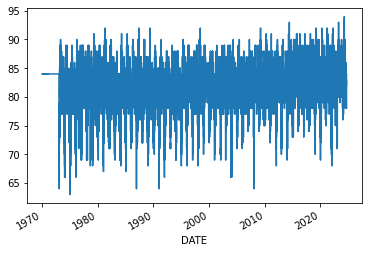

In [61]:
weather["tavg"].plot()

In [62]:
weather["target"] = weather.shift(-1)["tmax"]

In [63]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
1970-01-01,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-02,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-03,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-04,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-05,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1970-12-27,IN012121100,"MATHERAN, IN",0.0,84.0,90.0,78.0,90.0
1970-12-28,IN012121100,"MATHERAN, IN",0.0,84.0,90.0,78.0,90.0
1970-12-29,IN012121100,"MATHERAN, IN",0.0,84.0,90.0,78.0,90.0


In [64]:
weather = weather.ffill()

In [65]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
1970-01-01,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-02,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-03,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-04,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-05,IN012120500,"URAN, IN",0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1970-12-27,IN012121100,"MATHERAN, IN",0.0,84.0,90.0,78.0,90.0
1970-12-28,IN012121100,"MATHERAN, IN",0.0,84.0,90.0,78.0,90.0
1970-12-29,IN012121100,"MATHERAN, IN",0.0,84.0,90.0,78.0,90.0


In [66]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [67]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [68]:
predictors

Index(['prcp', 'tavg', 'tmax', 'tmin'], dtype='object')

In [77]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [78]:
weather[predictors] = weather[predictors].fillna(weather[predictors].mean())


In [79]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
1970-01-01,IN012120500,"URAN, IN",0.0,81.815517,90.14804,73.341297,90.148033
1970-01-02,IN012120500,"URAN, IN",0.0,81.815517,90.14804,73.341297,90.148033
1970-01-03,IN012120500,"URAN, IN",0.0,81.815517,90.14804,73.341297,90.148033
1970-01-04,IN012120500,"URAN, IN",0.0,81.815517,90.14804,73.341297,90.148033
1970-01-05,IN012120500,"URAN, IN",0.0,81.815517,90.14804,73.341297,90.148033
...,...,...,...,...,...,...,...
1970-12-27,IN012121100,"MATHERAN, IN",0.0,84.000000,90.00000,78.000000,90.000000
1970-12-28,IN012121100,"MATHERAN, IN",0.0,84.000000,90.00000,78.000000,90.000000
1970-12-29,IN012121100,"MATHERAN, IN",0.0,84.000000,90.00000,78.000000,90.000000


In [80]:
predictors

Index(['prcp', 'tavg', 'tmax', 'tmin'], dtype='object')

In [82]:
train["target"].fillna(train["target"].mean(), inplace=True)  # Filling NaN with the mean


NameError: name 'train' is not defined

In [76]:
print(train["target"].isna().sum())  # Check how many NaN values are in the target column


NameError: name 'train' is not defined